<a href="https://colab.research.google.com/github/athensclub/Thai-Word-Cutter/blob/master/main_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing and Housekeeping**

In [2]:
%tensorflow_version 2.x
from google.colab import files
from keras.preprocessing import sequence
import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate, Flatten,LSTM
import tensorflow as tf
import os
import numpy as np

uploaded = files.upload()

Saving news_00001.txt to news_00001.txt


# **Create a mapping from a character to an integer**

In [0]:
characters = 'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤลฦวศษสหฬอฮฯะัาำิีึืฺุู฿เแโใไๅๆ็่้๊๋์ํ๎๏๐๑๒๓๔๕๖๗๘๙abcdefghijklmnopqrstuvwxyz"\'0123456789,.!?/\\:;%()[]{}+_-*@#><=^$& \t\n'
char_encode = {}
char_decode = {}
i = 1
for c in characters:
  char_encode[c] = i;
  char_decode[i] = c;
  i += 1

# **Function: `encode(data)`**

> Accepts: (data)
*   data: the string to be converted to list of integers.


> Returns: (encoded)
*   encoded: the list of integers encoded from the given data string







In [0]:
def encode(data):
  encoded = []
  data = data.lower()
  for c in data:
    encoded.append(char_encode[c])
  return encoded

# **Function: `decode(data)`**

> Accepts: (data)
*   data: the list of integers to be converted to string

> Returns: (decoded)
*   decoded: the string that is decoded from list of integers given from data





In [0]:
def decode(data):
  decoded = ''
  for c in data:
    decoded = decoded + char_decode[c]
  return decoded

# **Function: `convert_data(data)`**
> Accepts: (data)
*   data: raw string read from news file

> Returns: (encoded,ans)
*  encoded: The string that is created from removing separator '|' from original raw string, which is then encoded into integers by function ```encode(data)```
*   ans: The array that is of the same length as combined string and has value be either 0 or 1. The 0 means that the character at that index of combined string should not be cut while 1 means that it should be cut







 

In [0]:
def convert_data(data):
  splitted = data.split('|')
  encoded = encode(data.replace('|',''))
  ans = np.zeros(len(encoded))
  i = 0;
  for s in splitted:
    if(len(s) > 0):
      i += len(s) 
      ans[i - 1] = 1
  return encoded,ans

# **Function: `split_data(encoded,ans,length=256)`**
A function that split by whitespace and then combine them together into array that the size does not exceed the length and return the result of combining all the combined all of the splitted data into one list, mapped to another answer array by index

> Accepts: (encoded,ans,length=256)
*   encoded: the encoded data that is going to be splitted
*   ans: the array of the answer of the data
*   length: the maximum size of each splitted data (default value is 256)

> Returns: (splitted,splitted_ans)
*   splitted: the list of the splitted data
*   splitted_ans: the list of the answer to the splitted data, mapped by index








In [0]:
def split_data(encoded,ans,length=256):
  splitted = []
  splitted_ans = []
  ans_chunk = []
  chunk = []
  temp = []
  ans_temp = []
  for i in range(len(encoded)):
    c = encoded[i]
    temp.append(c)
    ans_temp.append(ans[i])
    if c == char_encode[' ']:
      if len(temp) > 0:
        if len(temp) + len(chunk) < length:
          chunk.extend(temp)
          ans_chunk.extend(ans_temp)
          ans_temp = []
          temp = []
        else:
          splitted.append(chunk)
          splitted_ans.append(ans_chunk)
          chunk = []
          ans_chunk = []
          chunk.extend(temp)
          ans_chunk.extend(ans_temp)
          ans_temp = []
          temp = []
  #cleaning leftovers
  if len(temp) > 0:
    if len(temp) + len(chunk) < length:
      chunk.extend(temp)
      ans_chunk.extend(ans_temp)
    else:
      splitted.append(chunk)
      splitted_ans.append(ans_chunk)
      chunk.extend(temp)
      ans_chunk.extend(ans_temp)
  if len(chunk) > 0:
    splitted.append(chunk)
    splitted_ans.append(ans_chunk)
  return splitted,splitted_ans

In [0]:
def create_training_data(splitted,splitted_ans):
  before = []
  current = []
  after = []
  ans = []
  for i in range(len(splitted)):
    chunk = splitted[i]
    chunk_ans = splitted_ans[i]
    temp = []
    chunk_before = []
    chunk_after = chunk.copy()
    for j in range(len(chunk)):
      temp = temp.copy()
      temp.append(chunk[j])
      chunk_after = chunk_after.copy()
      chunk_after.pop(0)
      before.append(chunk_before)
      current.append(temp)
      after.append(chunk_after)
      ans.append(chunk_ans[j])
      if chunk_ans[j] == 1:
        chunk_before = chunk_before.copy()
        chunk_before.extend(temp)
        temp = []
    if len(temp) > 0:
      before.append(chunk_before)
      current.append(temp)
      after.append(chunk_after)
      ans.append(chunk_ans[len(chunk_ans)-1])
  return before,current,after,ans

In [13]:
file = open('news_00001.txt','r')
if file.mode == 'r':
  train_data = file.read()
print('done reading')
(train_encoded,train_ans) = convert_data(train_data)
print('done converting')
(train_splitted,train_splitted_ans) = split_data(train_encoded,train_ans)
print('done splitting')
(train_data_before,train_data_current,train_data_after,train_data_ans) = create_training_data(train_splitted,train_splitted_ans)
print('done preprocessing')
'''
test_splitted = []
test_splitted_ans = []
for i in range(3000):
  test_splitted.append(train_splitted.pop())
  test_splitted_ans.append(train_splitted_ans.pop())
train_splitted = sequence.pad_sequences(train_splitted, 256)
train_splitted_ans = sequence.pad_sequences(train_splitted_ans, 256)
test_splitted = sequence.pad_sequences(test_splitted, 256)
test_splitted_ans = sequence.pad_sequences(test_splitted_ans, 256)
'''

done reading
done converting
done splitting
done preprocessing


'\ntest_splitted = []\ntest_splitted_ans = []\nfor i in range(3000):\n  test_splitted.append(train_splitted.pop())\n  test_splitted_ans.append(train_splitted_ans.pop())\ntrain_splitted = sequence.pad_sequences(train_splitted, 256)\ntrain_splitted_ans = sequence.pad_sequences(train_splitted_ans, 256)\ntest_splitted = sequence.pad_sequences(test_splitted, 256)\ntest_splitted_ans = sequence.pad_sequences(test_splitted_ans, 256)\n'

In [23]:
i = 11
print(decode(train_data_before[i]))
print(decode(train_data_current[i]))
print(decode(train_data_after[i]))
print(train_data_ans[i])
print(len(train_data_before))
print(len(train_data_current))
print(len(train_data_after))
print(len(train_data_ans))

สงสัยติด
หวัด
นก อีกคนยังน่าห่วงตามที่นางประนอม ทองจันทร์ กับ ด.ช.กิตติพงษ์ แหลมผักแว่น และ ด.ญ.กาญจนา กรองแก้ว ป่วยสงสัยติดเชื้อไข้ขณะนี้ยังไม่ดีขึ้นหลังเข้าเยี่ยมดูอาการผู้ป่วยแล้ว น.พ.จรัลประชุมร่วมกับเจ้าหน้าที่ทุกฝ่าย เพื่อสรุปผลการดำเนินการ 
1.0
45745
45745
45745
45745


In [0]:
num_chars = len(characters)

before_input = Input(shape=(None,), name='before')  
current_input = Input(shape=(None,), name='current') 
after_input = Input(shape=(None,), name='after')  

before_features = Embedding(num_chars, 64)(before_input)
current_features = Embedding(num_chars, 64)(current_input)
after_features = Embedding(num_chars, 64)(after_input)

before_features = LSTM(128)(before_features)
current_features = LSTM(128)(current_features)
after_features = LSTM(128)(after_features)

x = Concatenate()([before_features, current_features, after_features])

out = Dense(1,activation='sigmoid',name='output')(x)

# Instantiate an end-to-end model predicting both priority and department
model = Model(inputs=[before_input, current_input, after_input],
                    outputs=[out])

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
before (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
current (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
after (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, None, 64)     9792        before[0][0]                     
______________________________________________________________________________________________

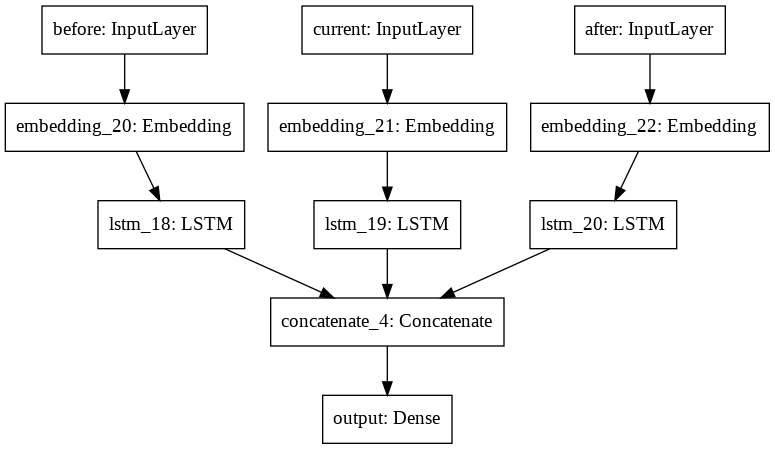

In [37]:
tfutil.plot_model(model, 'my_first_model.png')


In [0]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['acc'])

In [20]:
history = model.fit([train_data_before,train_data_current,train_data_after],[train_data_ans] , epochs=1)

IndexError: ignored